## 1. Create a study guide for all the supervised learning models we have gone over. Include information about how the algorithms work, how they are evaluated, and any other information you deem necessary. Use your own words. Do NOT copy mine or that of articles we have read.

* **Linear Regression**
Linear regression predicts a dependent variable value (y) based on a given independent variable (x). It finds out a linear relationship between x (input) and y(output).
To evaluate the performance we can use accuracy score or R-squared, the coefficient of determination.


* **Nearest Neighbor - KNN** 
KNN model can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. The new data point is assigned a value based on how closely it resembles the points in the training set.
To evaluate the performance, we can obviously use the accuracy score. But also a confusion matrix, typically it's most commonly used for classification problems.

--> Accuracy is the most intuitive performance measure, and defined as the ratio of the number of correctly classified objects to the total number of objects evaluated.


--> Precision it is simply a ratio of correctly predicted positive data objects to the total predicted positive data objects.

--> Recall it is defined by the number of correct positive results divided by the total number of relevant samples (all samples that should have been identified as positive).


--> F-score it can be defined as a weighted average of the precision and recall. An F-score is considered perfect when reaches its best value at 1, while the model is a total failure when it reaches the 0 value.


* **Logistic Regression**
Logistic regression is a perfect lgorithm to use for for binary classification problems, for example, predict True/False, Won/Lost, etc.
We can again use the confusion matrix or/and accuracy score to evaluate the model. 

* **Decision Trees**
Decision trees are step-by-step rather than a continuous process algorithms. A decision tree consists of 3 types of nodes: Root Nodes, Decision Nodes, and Leaf Nodes. Each node in the tree acts as a test case for some attribute and each edge descending from that node corresponds to one of the possible answers to the test case. We can use confusion matrix, accuracy score or classification report to measure the model's performance.

* **Support Vector Machine (SVM)**
Support Vector Machine is a linear model for classification and regression problems. The algorithm creates a line or a hyperplane which separates the data into classes.

* **Random Forest**
The random forest model instead of searching for the most important features while splitting a node, it searches for the best feature among a random subset of features. This results in a better diversity. So as a result, it can produce a better performing model.

## 2. Do the same as question 1 except for unsupervised learning models. Something that is necessary for many models is determining number, so specify how you determine the number of clusters for example. Apply this concept to any other algorithms it is relevant for.

* **Hierarchical clustering**
Hierarchical clustering is an algorithm which builds a hierarchy of clusters. It begins with all the data which is assigned to a cluster of their own. Here, two close cluster are going to be in the same cluster. This algorithm ends when there is only one cluster left.

* **K-means clustering**
In this clustering method, we need to cluster the data points into k groups. Then we can build an elbow graph to determine the ideal number of clusters.  The “elbow”(the point of inflection on the curve) is the best value of k. 

* **K-NN (k nearest neighbors)**
It stores all available cases and classifies new instances based on a similarity measure.

* **Principal Component Analysis**

## 3. Preprocess the customer data https://www.kaggle.com/carrie1/ecommerce-data . How are you handling nulls? What process(es) are you using to encode and normalize the data?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statistics as stats
from scipy import stats

#loading cast dataset
customers_df = pd.read_csv('data.csv', encoding= 'unicode_escape')

customers_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


### Exploring the data

In [2]:
customers_df['Country'].value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [3]:
groupedSegment = customers_df.groupby("Country")
groupedSegment['CustomerID'].nunique().sort_values(ascending=False)

Country
United Kingdom          3950
Germany                   95
France                    87
Spain                     31
Belgium                   25
Switzerland               21
Portugal                  19
Italy                     15
Finland                   12
Austria                   11
Norway                    10
Channel Islands            9
Netherlands                9
Denmark                    9
Australia                  9
Cyprus                     8
Sweden                     8
Japan                      8
Poland                     6
Canada                     4
Greece                     4
Unspecified                4
USA                        4
Israel                     4
EIRE                       3
Malta                      2
Bahrain                    2
United Arab Emirates       2
Iceland                    1
Lebanon                    1
Lithuania                  1
European Community         1
Czech Republic             1
RSA                        1
Saudi 

In [4]:
#customer_df[customer_df['Country']!='United Kingdom']['CustomerID'].nunique()

In [5]:
#adding a new column that calculates the total amount of money each customer spent
customers_df["total cost"] = customers_df["UnitPrice"] * customers_df["Quantity"]

In [6]:
#which country purchases most -- United Kingdom
groupedSegment["total cost"].sum()

Country
Australia               1.370773e+05
Austria                 1.015432e+04
Bahrain                 5.484000e+02
Belgium                 4.091096e+04
Brazil                  1.143600e+03
Canada                  3.666380e+03
Channel Islands         2.008629e+04
Cyprus                  1.294629e+04
Czech Republic          7.077200e+02
Denmark                 1.876814e+04
EIRE                    2.632768e+05
European Community      1.291750e+03
Finland                 2.232674e+04
France                  1.974039e+05
Germany                 2.216982e+05
Greece                  4.710520e+03
Hong Kong               1.011704e+04
Iceland                 4.310000e+03
Israel                  7.907820e+03
Italy                   1.689051e+04
Japan                   3.534062e+04
Lebanon                 1.693880e+03
Lithuania               1.661060e+03
Malta                   2.505470e+03
Netherlands             2.846615e+05
Norway                  3.516346e+04
Poland                  7.2131

In [7]:
#dropping columns we won't use
edited_df = customers_df.drop(["StockCode", "InvoiceDate", "Description", "InvoiceNo"], axis=1)

In [8]:
#dropping the NaN values within the data we selected
clean = edited_df.dropna()

## 4. Perform k-means on this dataset for customer segments. Customer segments help determine what types of people buy your product, which allows you to target more people like your usual customers. Should you look at all the data, or which subset of data should you use? What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [9]:
clean.head()

,Quantity,UnitPrice,CustomerID,Country,total cost
0,6,2.55,17850.0,United Kingdom,15.30
1,6,3.39,17850.0,United Kingdom,20.34
2,8,2.75,17850.0,United Kingdom,22.00
3,6,3.39,17850.0,United Kingdom,20.34
4,6,3.39,17850.0,United Kingdom,20.34


In [10]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
X = clean.drop('Country',axis=1)
y = clean['Country']

In [11]:
inertias = []
distortions = []
for k in range(1,10):
    #build and fit the model
    model = KMeans(n_clusters=k).fit(X)
    
    #average of squared distance from cluster center to the data points
    distortion = sum(np.min(cdist(X, model.cluster_centers_,
                                  'euclidean'),axis =1))/X.shape[0]
    
    distortions.append(distortion)
    
    inertia = model.inertia_
    inertias.append(inertia)

Text(0.5, 1.0, 'Elbow Method with Distortion')

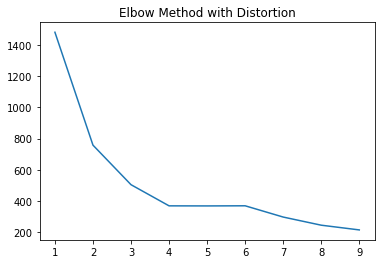

In [12]:
plt.plot(range(1,10),distortions)
plt.title('Elbow Method with Distortion')

Text(0.5, 1.0, 'Elbow Method with Inertia')

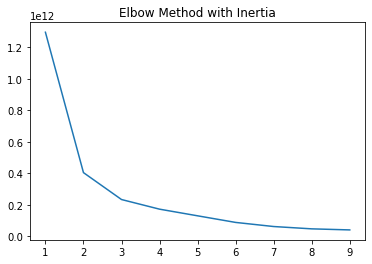

In [13]:
plt.plot(range(1,10),inertias)
plt.title('Elbow Method with Inertia')

We can only look at quantity, unit price, customer id and total cost columns of this data set. Total cost column calculates the total amount of money each customer spent on a product(UnitPrice*Quantity).

To calculate the ideal nimber of clusters we used the elbow method. It finds the best value of k. it picks up the range of values and takes the best among them. It calculates the sum of the square of the points and calculates the average distance. 

The ideal number of clusters in this case, seems to be 3, based on the elbow graphs.

## 5. Perform hierarchical clustering for customer segments. What is the ideal number of clusters? Which approach did you use to find the ideal number of clusters and why?

In [14]:
clean.head()

,Quantity,UnitPrice,CustomerID,Country,total cost
0,6,2.55,17850.0,United Kingdom,15.30
1,6,3.39,17850.0,United Kingdom,20.34
2,8,2.75,17850.0,United Kingdom,22.00
3,6,3.39,17850.0,United Kingdom,20.34
4,6,3.39,17850.0,United Kingdom,20.34


In [15]:
smaller_df=clean.drop(["UnitPrice", "Quantity"], axis=1)

In [16]:
X = smaller_df.drop('Country',axis=1)
y = smaller_df['Country']

In [17]:
#from scipy.cluster.hierarchy import dendrogram, linkage

#linked = linkage(X,'ward')
#plt.figure(figsize=(10,7))

#dendro = dendrogram(linked, labels=list(y))
#plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(X)

## 6. Compare the results of 4 and 5. Which approach do you think is best? Why? 